In [38]:
output1 = pickle.load(open('MC_iter_0','rb'))
output2 = pickle.load(open('MC_iter_1','rb'))

In [56]:
output1 = pickle.load(open('SARSA_0','rb'))
output2 = pickle.load(open('SARSA_1','rb'))

In [57]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
import random 
import math

In [58]:
alphas = [0.1, 0.2]

In [59]:
repetitions = 300
iterations = 1000

In [60]:
dynamic_values = pickle.load(open('Dynamic','rb'))

In [61]:
output_noUpdate_a1 = output1[0]
values_noUpdate_a1 = np.array(output_noUpdate_a1)[:,0]
rewards_noUpdate_a1 = np.array(output_noUpdate_a1)[:,3]

output_update1_a1 = output1[1]
values_update1_a1 = np.array(output_update1_a1)[:,0]
rewards_update1_a1 = np.array(output_update1_a1)[:,3]

output_update2_a1 = output1[2]
values_update2_a1 = np.array(output_update2_a1)[:,0]
rewards_update2_a1 = np.array(output_update2_a1)[:,3]

#############################################################

output_noUpdate_a2 = output2[0]
values_noUpdate_a2 = np.array(output_noUpdate_a2)[:,0]
rewards_noUpdate_a2 = np.array(output_noUpdate_a2)[:,3]

output_update1_a2 = output2[1]
values_update1_a2 = np.array(output_update1_a2)[:,0]
rewards_update1_a2 = np.array(output_update1_a2)[:,3]

output_update2_a2 = output2[2]
values_update2_a2 = np.array(output_update2_a2)[:,0]
rewards_update2_a2 = np.array(output_update2_a2)[:,3]


In [62]:
mean_noUpdate_a1 = np.mean(rewards_noUpdate_a1,axis = 0)
mean_noUpdate_a2 = np.mean(rewards_noUpdate_a2,axis = 0)

mean_update1_a1 = np.mean(rewards_update1_a1,axis = 0)
mean_update1_a2 = np.mean(rewards_update1_a2,axis = 0)

mean_update2_a1 = np.mean(rewards_update2_a1,axis = 0)
mean_update2_a2 = np.mean(rewards_update2_a2,axis = 0)

#########################################################

#std_noUpdate_a1 = np.std(rewards_noUpdate_a1,axis = 0)
#std_noUpdate_a2 = np.std(rewards_noUpdate_a2,axis = 0)
#
#std_update1_a1 = np.std(rewards_update1_a1,axis = 0)
#std_update1_a2 = np.std(rewards_update1_a2,axis = 0)
#
#std_update2_a1 = np.std(rewards_update2_a1,axis = 0)
#std_update2_a2 = np.std(rewards_update2_a2,axis = 0)


In [63]:
s_a=2
s_e=2
if s_a == 2:
    selected_r = np.array(output2[s_e])[:,3]
    selected_v = np.array(output2[s_e])[:,0]
elif s_a == 1:
    selected_r = np.array(output1[s_e])[:,3]
    selected_v = np.array(output1[s_e])[:,0]

s_mean = np.mean(selected_r,axis = 0)
s_std = np.std(selected_r,axis = 0)
upper = s_mean + s_std
lower = s_mean - s_std

Text(0.5, 1.0, 'Reward per Iteration with α=0.2')

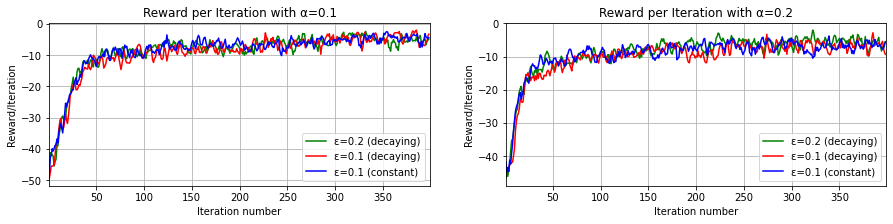

In [70]:
x_size = 15
y_size = 3

N=3
MA_signal = np.ones((N,))/N

xlim=400
plt.figure(1, figsize = (x_size,y_size))
plt.subplot(1,2,1)

x_axis = np.arange((N-1)/2,xlim-(N-1)/2)
plt.plot(x_axis,np.convolve(mean_update1_a1[:xlim], MA_signal, mode='valid'), color = 'g')
plt.plot(x_axis,np.convolve(mean_update2_a1[:xlim], MA_signal, mode='valid'), color = 'r')
plt.plot(x_axis,np.convolve(mean_noUpdate_a1[:xlim], MA_signal, mode='valid'), color = 'b')
plt.xlabel("Iteration number")
plt.ylabel("Reward/Iteration")
plt.grid(b=True)
plt.xlim((N-1)/2,xlim-(N-1)/2)
plt.legend(('ε=0.2 (decaying)','ε=0.1 (decaying)','ε=0.1 (constant)')) 
plt.title('Reward per Iteration with α={}'.format(alphas[0]))

plt.figure(1, figsize = (x_size,y_size))
plt.subplot(1,2,2)

plt.plot(x_axis,np.convolve(mean_update1_a2[:xlim], MA_signal, mode='valid'), color = 'g')
plt.plot(x_axis,np.convolve(mean_update2_a2[:xlim], MA_signal, mode='valid'), color = 'r')
plt.plot(x_axis,np.convolve(mean_noUpdate_a2[:xlim], MA_signal, mode='valid'), color = 'b')
plt.xlabel("Iteration number")
plt.ylabel("Reward/Iteration")
plt.grid(b=True)
plt.xlim((N-1)/2,xlim-(N-1)/2)
plt.legend(('ε=0.2 (decaying)','ε=0.1 (decaying)','ε=0.1 (constant)')) 
plt.title('Reward per Iteration with α={}'.format(alphas[1]))


In [71]:
errors=[]
for i in range(iterations):
    av = np.zeros(29)
    for rep in range(repetitions):
        av += selected_v[rep][i]
    av /= repetitions
    sqrt = math.sqrt(np.mean((dynamic_values - av)**2))
    errors.append(sqrt)

Text(0.5, 1.0, 'MSE over Iterations (α=0.2, ε=0.1 (decaying))')

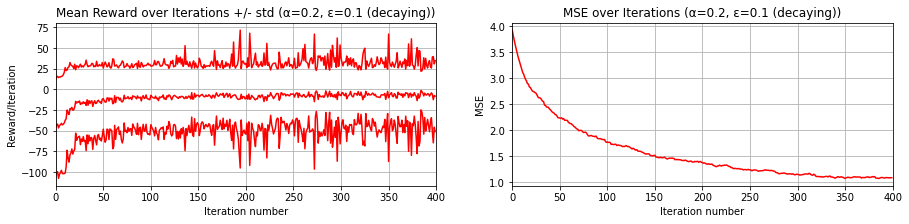

In [72]:
########### Learner



x_axis = np.arange(0,xlim)
plt.figure(2, figsize = (x_size,y_size))
plt.subplot(1,2,1)
plt.plot(x_axis,s_mean[:xlim], color = 'r')
plt.plot(x_axis,upper[:xlim], color = 'r')
plt.plot(x_axis,lower[:xlim], color = 'r')
plt.xlabel("Iteration number")
plt.ylabel("Reward/Iteration")
plt.grid(b=True)
plt.xlim(0, xlim)
plt.title('Mean Reward over Iterations +/- std (α=0.2, ε=0.1 (decaying))')


plt.figure(2, figsize = (x_size,y_size))
plt.subplot(1,2,2)
plt.plot(x_axis,errors[:xlim], color = 'r')
plt.xlabel("Iteration number")
plt.ylabel("MSE")
plt.grid(b=True)
plt.xlim(0, xlim)
plt.title('MSE over Iterations (α=0.2, ε=0.1 (decaying))')

In [73]:
dna = 'meow'

In [74]:
dna

'meow'